[17.869  17.91   17.9    17.9    17.9    17.83   17.8255 17.9    17.87
 17.88   17.875  17.875  17.8835 17.88   17.88   17.87   17.87   17.8622
 17.888  17.915  17.895  17.895  17.9    17.9    17.8965 17.9163 17.87
 17.87   17.87   17.87   17.8295 17.9    17.89   17.89   17.83   17.83
 17.8315 17.945  17.91   17.91   17.89   17.89   17.8775 17.84   17.84
 17.91   17.925  17.91   17.9145 17.92   17.91   17.9    17.91   17.915
 17.9165 17.915  17.915  17.91   17.91   17.84   17.8375 17.91   17.91
 17.91   17.89   17.89   17.8875 17.91   17.91   17.91   17.91   17.93
 17.9425 17.92   17.91   17.91   17.915  17.915  17.9245 17.91   17.915
 17.91   17.91   17.91   17.9155 17.92   17.91   17.91   17.91   17.91
 17.894  17.91   17.93   17.91   17.91   17.84   17.858  17.91   17.91
 17.91   17.91   17.91   17.7805 17.91   17.91   17.9575 17.89   17.89
 17.9    17.955  17.915  17.91   17.91   17.91   17.874  17.91   17.91
 17.935  17.91   17.91   17.8855 17.91   17.91   17.91   17.92   17.955
 

C:\Users\Ghandour\Anaconda3\envs\Capstone enviroment\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


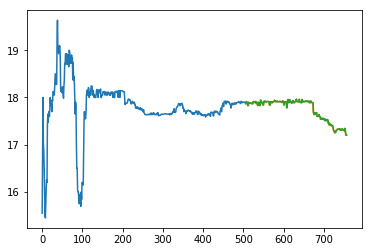

In [11]:
from sklearn.metrics import mean_squared_error
import pandas
import tensorflow
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('USD_EGP Historical Data.csv')
data=data.drop('Change %',axis=1)
data=data.drop('Date',axis=1)
data=data[5686:] #choosing the data after floating the egyptian pound only
working_data=data.ix[:,1]#choosing the price coloumn only
#print(working_data)
#print(data)
#plt.plot(data)


dataframe = pandas.concat([working_data.shift(1), working_data], axis=1)
dataframe.columns = ['t', 't+1']
#print(dataframe.head(5))


X=dataframe.values
train_size = int(len(X) * 0.67)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
#print(train_size)
print(test_X)



test_score = mean_squared_error(test_y, test_X)
print('Test MSE: %.3f' % test_score)


pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in test_X])
pyplot.show()

In [2]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(working_data.values.reshape(-1, 1))
#print(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#print(len(train), len(test))


def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


def create_model():
    model = Sequential()
    model.add(LSTM(1, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])
#model.fit(trainX, trainY, epochs=10, batch_size=5, verbose=2)
    return model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [1,10, 20, 40, 60, 80, 100]
epochs = [100, 500, 250]
param_grid = dict(batch_size=batch_size, epochs=epochs)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
#grid_result = grid.fit(trainX, trainY)
# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#model = Sequential()
#model.add(LSTM(1, input_shape=(1, look_back)))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(trainX, trainY, epochs=10, batch_size=5, verbose=2)



In [3]:
model = Sequential()
model.add(LSTM(1, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/10
 - 2s - loss: 0.1684 - acc: 0.0000e+00
Epoch 2/10
 - 1s - loss: 0.0117 - acc: 0.0020
Epoch 3/10
 - 1s - loss: 0.0101 - acc: 0.0020
Epoch 4/10
 - 1s - loss: 0.0093 - acc: 0.0020
Epoch 5/10
 - 1s - loss: 0.0085 - acc: 0.0020
Epoch 6/10
 - 1s - loss: 0.0075 - acc: 0.0020
Epoch 7/10
 - 1s - loss: 0.0065 - acc: 0.0020
Epoch 8/10
 - 1s - loss: 0.0056 - acc: 0.0020
Epoch 9/10
 - 1s - loss: 0.0046 - acc: 0.0020
Epoch 10/10
 - 1s - loss: 0.0037 - acc: 0.0020


In [4]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f ModelMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f ModelMSE' % (testScore))


Train Score: 0.26 ModelMSE
Test Score: 0.10 ModelMSE


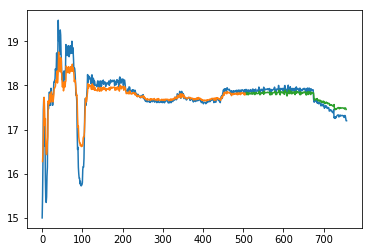

In [5]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()